Using TensorFlow backend.


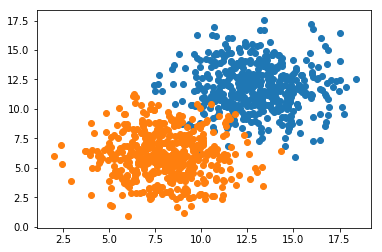

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])





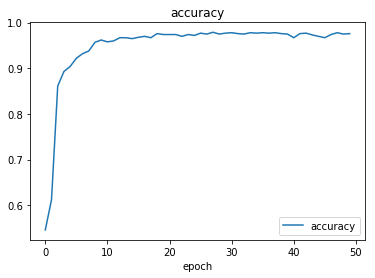

In [2]:
model = Sequential()
model.add(Dense(units = 1,input_shape=(2,),activation = 'sigmoid'))
adam = Adam(lr = 0.1)
model.compile(adam,loss='binary_crossentropy',metrics = ['accuracy'])
h= model.fit(x= X,y = y, verbose=0,batch_size = 50, epochs = 50, shuffle = 'true')

plt.plot(h.history['acc'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [3]:
def descision_boundary(X,y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx,yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel()
    grid = np.c_[xx_,yy_]
    predictions = model.predict(grid)

    z = predictions.reshape(xx.shape)
   
    plt.contourf(xx,yy,z,200)

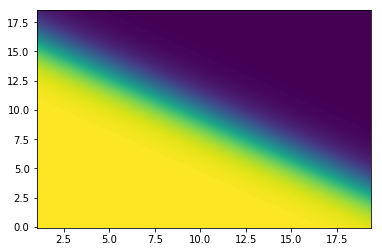

In [4]:
descision_boundary(X,y,model)